In [17]:
# Import Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
list(wine.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [4]:
df = pd.DataFrame(data=wine.data, columns= wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

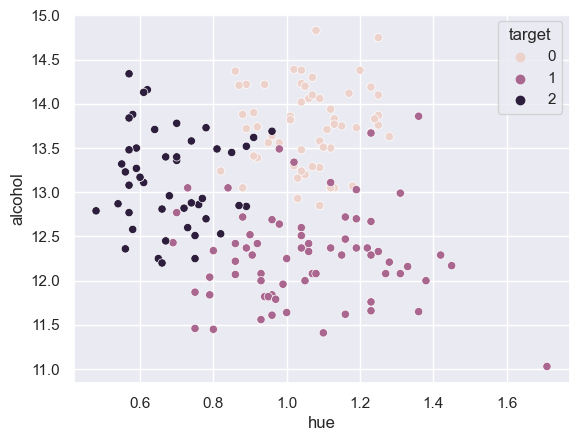

In [18]:
sns.scatterplot(x='hue',y='alcohol',hue='target',data=df)
plt.show()

In [19]:
X = df.drop('target',axis=1)
y = df.target

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [44]:
model1 = GaussianNB()
model1.fit(X_train,y_train)

GaussianNB()

In [45]:
model1.score(X_test,y_test)

0.9777777777777777

In [46]:
model2 = MultinomialNB()
model2.fit(X_train,y_train)

MultinomialNB()

In [47]:
model2.score(X_test,y_test)

0.8444444444444444

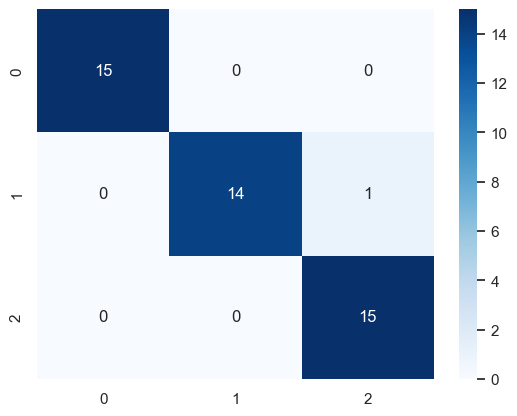

In [48]:
y_pred1 = model1.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.show()

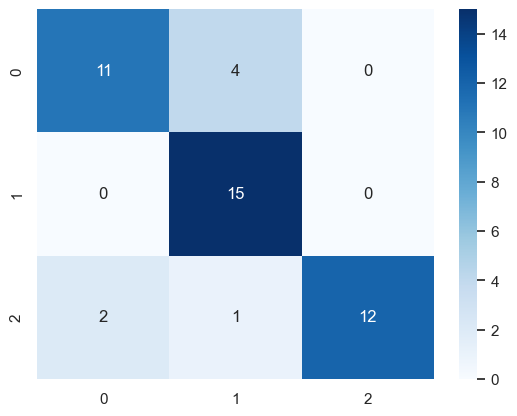

In [49]:
y_pred2 = model2.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm1,annot=True,cmap='Blues')
plt.show()

In [50]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [51]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.75      1.00      0.86        15
           2       1.00      0.80      0.89        15

    accuracy                           0.84        45
   macro avg       0.87      0.84      0.84        45
weighted avg       0.87      0.84      0.84        45

